In [61]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

sys.path.append(os.path.join('D:\PRML\pyblish','plots'))
import publish

In [69]:
zeta = 0.05
omega = 10
H = [0.1, 0.04, 0.008]

def f(t) :
    return ( 399**0.5 * np.sin(399**0.5 * t/2) + 399 * np.cos(399**0.5 * t/2) )*np.exp(-t/2) / 199500

func = np.vectorize(f)

def fd(t) : 
    return (( 399 * np.cos(399**0.5 * t/2)/2 - 399**1.5 * np.sin(399**0.5 * t/2)/2 ) - ( 399**0.5 * np.sin(399**0.5 * t/2) + 399 * np.cos(399**0.5 * t/2))/2 )*np.exp(-t/2) / 199500

funcd = np.vectorize(fd)

def state_eqn(x,xd) :
    global zeta
    global omega
    return np.array([[xd],[-2*zeta*omega*xd -omega*omega*x]])

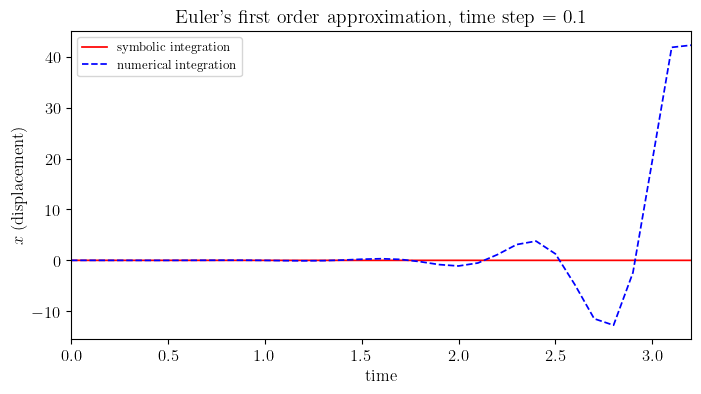

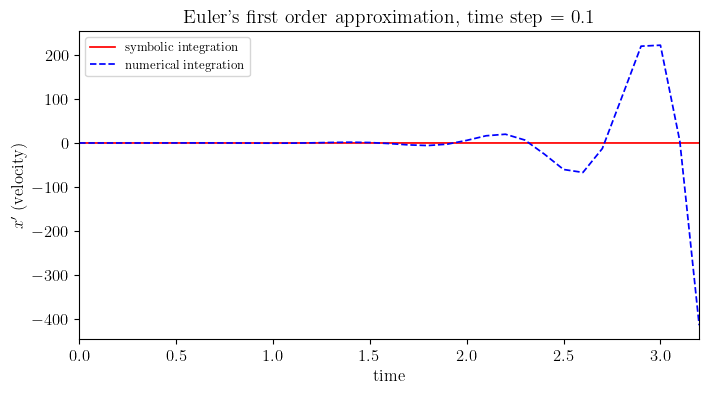

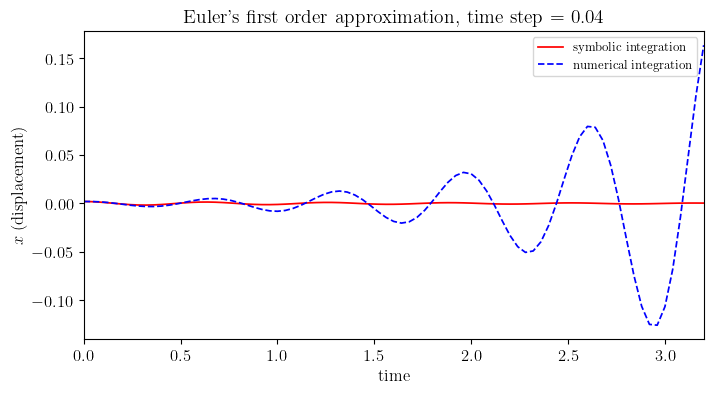

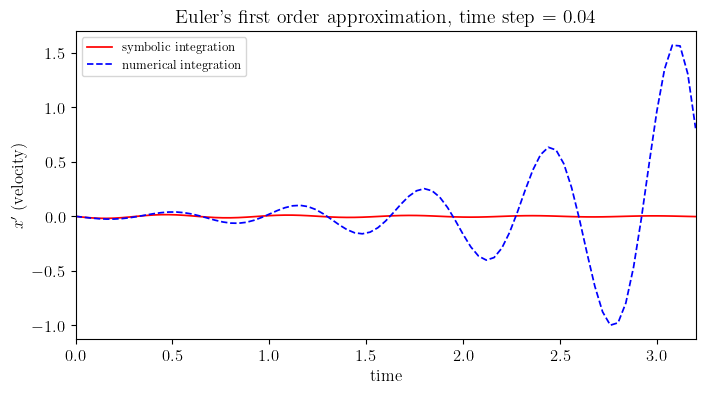

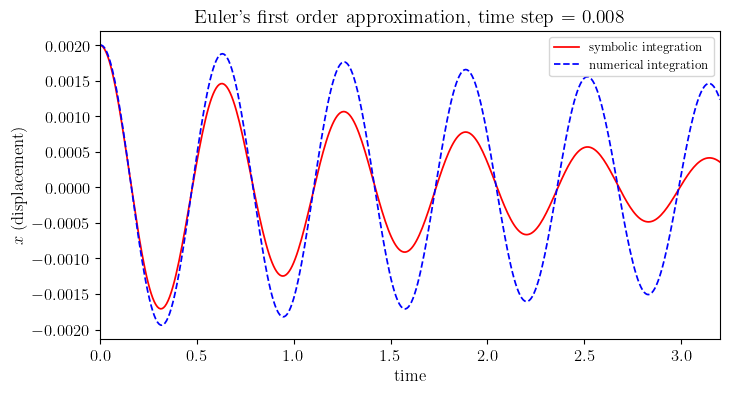

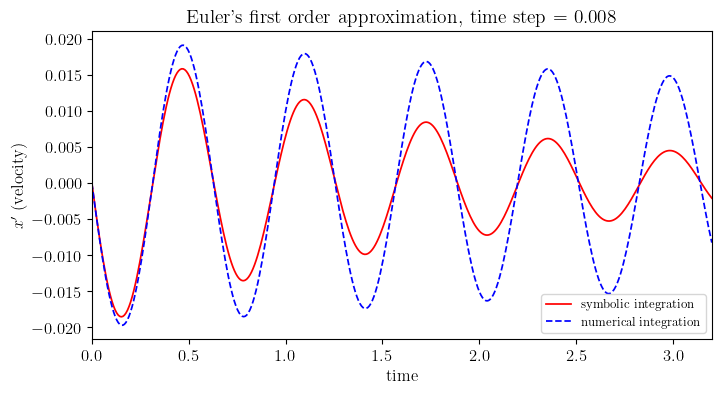

In [91]:
for h in H : 
    T  = np.arange(0,3.2+h,h)
    x  = [0.002]
    xd = [0]
    for i in range(len(T)-1) :
        change = h*state_eqn(x[i],xd[i])
        x.append(x[i]+change[0,0])
        xd.append(xd[i]+change[1,0])
    
    plt.figure(figsize=(8,4))
    plt.plot(T,func(T),color='red')
    plt.plot(T,x,color='blue')
    plt.xlim(0,3.2)
    plt.ylabel('$x$ (displacement)')
    plt.xlabel('time')
    plt.legend(['symbolic integration', 'numerical integration'])
    plt.title(f"Euler's first order approximation, time step = {h}")
    plt.savefig(f'D:\downloads\MBD_Numerical_integration\Euler_x_{h}.png',dpi=300)
    plt.show()

    plt.figure(figsize=(8,4))
    plt.plot(T,funcd(T),color='red')
    plt.plot(T,xd,color='blue')
    plt.xlim(0,3.2)
    plt.ylabel("$x'$ (velocity)")
    plt.xlabel('time')
    plt.legend(['symbolic integration', 'numerical integration'])
    plt.title(f"Euler's first order approximation, time step = {h}")
    plt.savefig(f'D:\downloads\MBD_Numerical_integration\Euler_xd_{h}.png',dpi=300)
    plt.show()

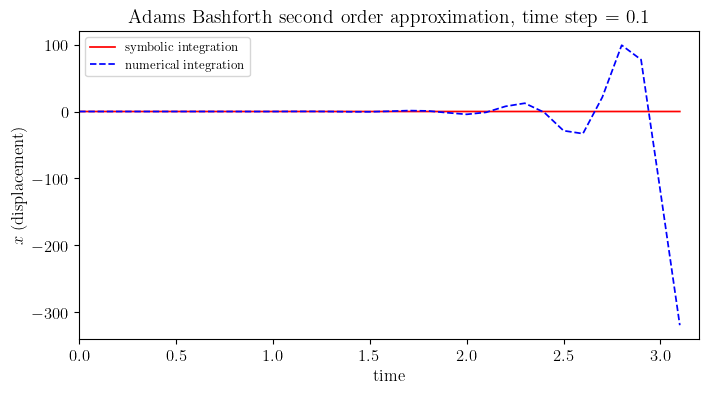

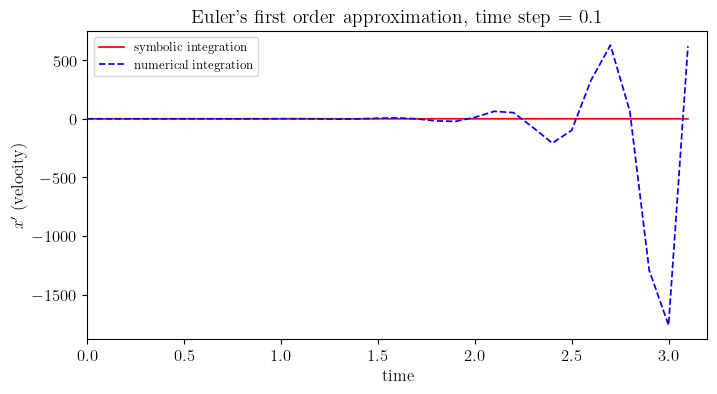

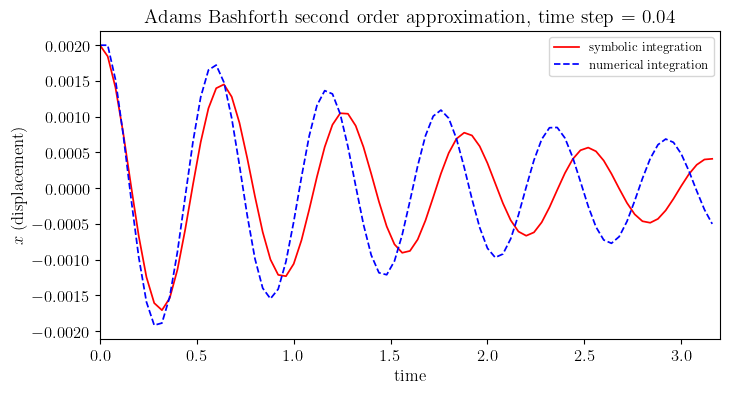

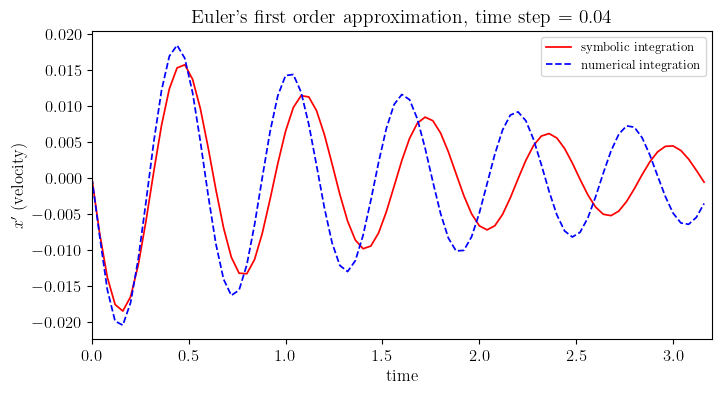

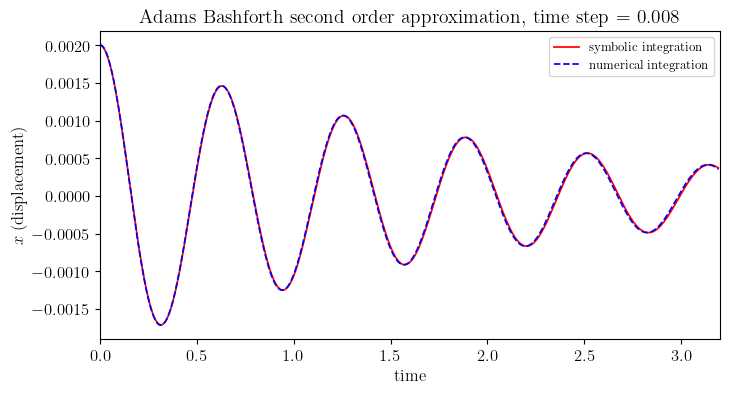

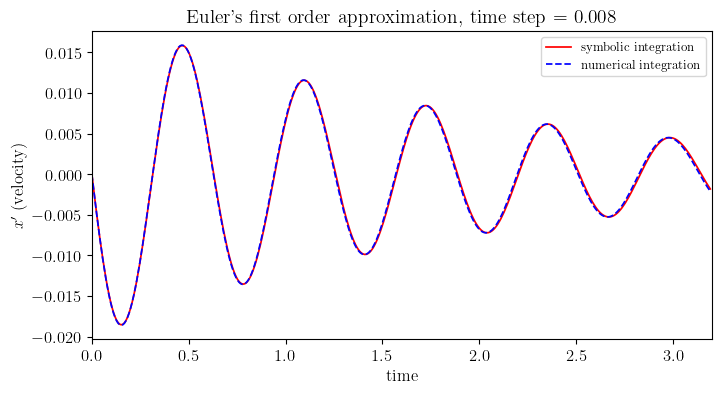

In [92]:
for h in H : 
    T  = np.arange(0,3.2,h)
    x  = [0.002, 0.002]
    xd = [0, -0.2*h]
    for i in range(1,len(T)-1) :
        change = h*(3*state_eqn(x[i],xd[i]) - state_eqn(x[i-1],xd[i-1]))/2
        x.append(x[i]+change[0,0])
        xd.append(xd[i]+change[1,0])
     
    plt.figure(figsize=(8,4))
    plt.plot(T,func(T),color='red')
    plt.plot(T,x,color='blue')
    plt.xlim(0,3.2)
    plt.ylabel('$x$ (displacement)')
    plt.xlabel('time')
    plt.legend(['symbolic integration', 'numerical integration'])
    plt.title(f"Adams Bashforth second order approximation, time step = {h}")
    plt.savefig(f'D:\downloads\MBD_Numerical_integration\AB_x_{h}.png',dpi=300)
    plt.show()

    plt.figure(figsize=(8,4))
    plt.plot(T,funcd(T),color='red')
    plt.plot(T,xd,color='blue')
    plt.xlim(0,3.2)
    plt.ylabel("$x'$ (velocity)")
    plt.xlabel('time')
    plt.legend(['symbolic integration', 'numerical integration'])
    plt.title(f"Euler's first order approximation, time step = {h}")
    plt.savefig(f'D:\downloads\MBD_Numerical_integration\AB_xd_{h}.png',dpi=300)
    plt.show()